<h1>Projeto MLP: Classificação de sintomas de dor nas costas 🤕</h1> 

<p>Este projeto é parte da disciplina de Sistemas Inteligentes. Nele trabalharemos com a base de dados "Lower Back Pain Symptoms Dataset" com o objetivo de classificar os dados utilizando uma MLP.</p>

# Análise e tratamento de dados 🕵️

Nesta sessão iremos analisar nossa base de dados, buscando entender seus atributos, analisar possíveis anomalias e definir dados de treino, validação e teste.

Primeiramente vamos importar as bibliotecas necessárias sendo elas:
- Numpy: Operações matemáticas;
- Pandas: Manipulação de datasets;
- Sklearn: Modelos de machine learning.
- Seaborn/Matplotlib: Plotagem de gráficos

In [476]:
# importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

Agora importamos a base de dados utilizando o pandas

In [477]:
# Importando dados e visualizando algumas instâncias
df = pd.read_csv('./Dataset_spine.csv')
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


Como a coluna 'Unnamed:13' os rotúlos do dataset que não são útes para a classificação, então podemos remove-lá.

Nesse momento também separamos os atributos utilizados no treino da classificação


In [478]:
df = df.drop(['Unnamed: 13'], axis=1)
y = df['Class_att']
X = df.drop(['Class_att'], axis=1)

Agora, verificamos se há dados faltantes em alguma das colunas

In [479]:
print(df.isnull().sum())

Col1         0
Col2         0
Col3         0
Col4         0
Col5         0
Col6         0
Col7         0
Col8         0
Col9         0
Col10        0
Col11        0
Col12        0
Class_att    0
dtype: int64


 Como não encontramos nenhum NaN, podemos assumir que não há dados faltando em nenhuma das colunas, portanto não será necessário realizar tratamento para esses casos.
 Em seguida, vamos visualizar os outliers.

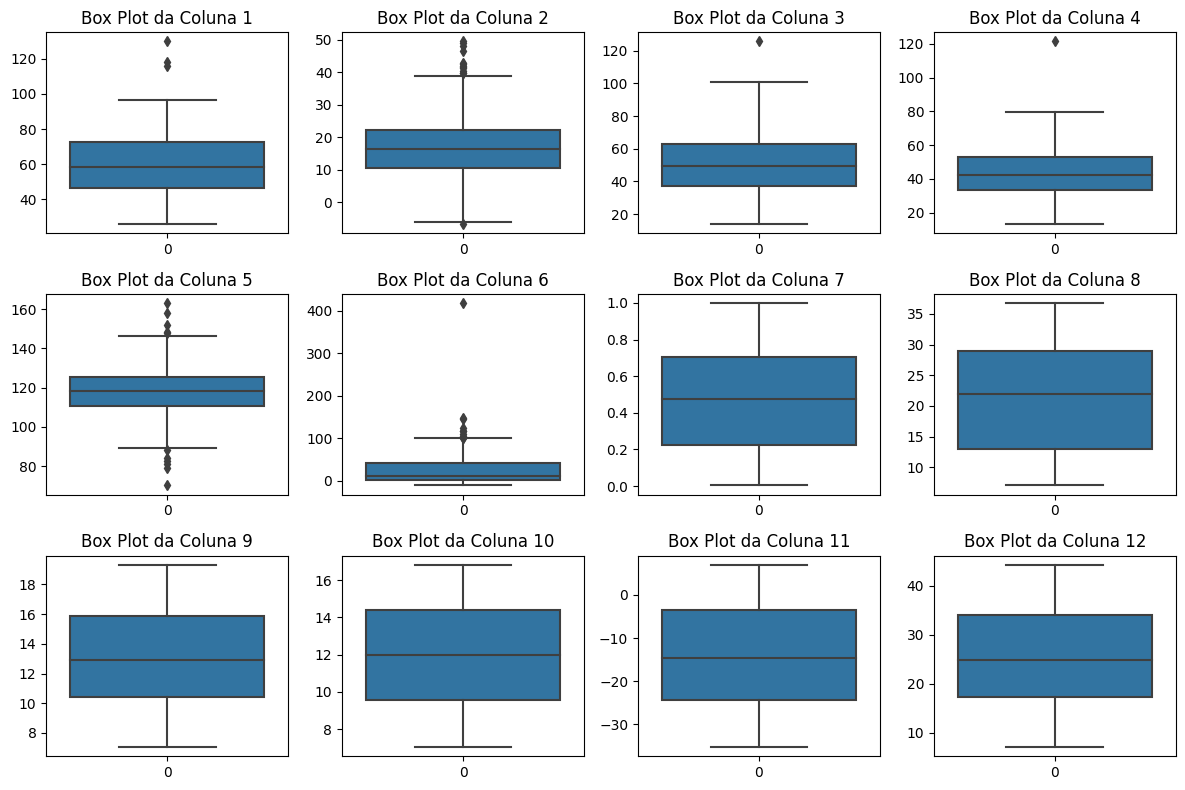

In [480]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crie uma grade de subplots 3x4 (3 linhas e 4 colunas)
fig, axes = plt.subplots(3, 4, figsize=(12, 8))

# Itere pelas colunas e adicione os boxplots aos subplots
for col in range(1, 13):
    row = (col - 1) // 4  # Calcule a linha atual
    col_idx = (col - 1) % 4  # Calcule a coluna atual
    ax = axes[row, col_idx]  # Obtenha o subplot atual

    sns.boxplot(df[f'Col{col}'], ax=ax)
    ax.set_title(f'Box Plot da Coluna {col}')

# Ajuste o layout
plt.tight_layout()

# Exiba o gráfico
plt.show()

posições do outlier (vamos usar?)

In [481]:
from scipy import stats
z = np.abs(stats.zscore(df['Col5']))
threshold = 3
# Position of the outlier
print(np.where(z > threshold))

(array([ 85, 167, 180]),)



# Primeiro Treino 💪

In [482]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)

In [483]:
model = MLPClassifier(verbose=True, max_iter=200)
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': True,
 'warm_start': False}

In [484]:
model.fit(X_train, y_train)

Iteration 1, loss = 18.65924640
Iteration 2, loss = 13.39233028
Iteration 3, loss = 8.20175247
Iteration 4, loss = 4.01118445
Iteration 5, loss = 1.40595159
Iteration 6, loss = 0.57989653
Iteration 7, loss = 1.38577625
Iteration 8, loss = 2.19768914
Iteration 9, loss = 2.60677561
Iteration 10, loss = 2.58661456
Iteration 11, loss = 2.22810433
Iteration 12, loss = 1.66034430
Iteration 13, loss = 1.03674433
Iteration 14, loss = 0.60923655
Iteration 15, loss = 0.55926888
Iteration 16, loss = 0.78979992
Iteration 17, loss = 0.95170481
Iteration 18, loss = 0.97759747
Iteration 19, loss = 0.86620216
Iteration 20, loss = 0.67611235
Iteration 21, loss = 0.52536664
Iteration 22, loss = 0.50332529
Iteration 23, loss = 0.57103102
Iteration 24, loss = 0.61997533
Iteration 25, loss = 0.59405556
Iteration 26, loss = 0.52311850
Iteration 27, loss = 0.46667112
Iteration 28, loss = 0.46309075
Iteration 29, loss = 0.47851386
Iteration 30, loss = 0.47816301
Iteration 31, loss = 0.45712795
Iteration 32, l

/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future

Iteration 43, loss = 0.38690183
Iteration 44, loss = 0.38442240
Iteration 45, loss = 0.38155315
Iteration 46, loss = 0.37849819
Iteration 47, loss = 0.37540531
Iteration 48, loss = 0.37234373
Iteration 49, loss = 0.36919672


Iteration 50, loss = 0.36808719
Iteration 51, loss = 0.37203762
Iteration 52, loss = 0.37808507
Iteration 53, loss = 0.37258316
Iteration 54, loss = 0.36255055
Iteration 55, loss = 0.35363702
Iteration 56, loss = 0.35188758
Iteration 57, loss = 0.35388909
Iteration 58, loss = 0.35016445
Iteration 59, loss = 0.34448645
Iteration 60, loss = 0.34458327
Iteration 61, loss = 0.34368397
Iteration 62, loss = 0.34129287
Iteration 63, loss = 0.33848235
Iteration 64, loss = 0.33772954
Iteration 65, loss = 0.33601982
Iteration 66, loss = 0.33380883
Iteration 67, loss = 0.33304417
Iteration 68, loss = 0.33211156
Iteration 69, loss = 0.33019513
Iteration 70, loss = 0.32805150
Iteration 71, loss = 0.32987511
Iteration 72, loss = 0.33217501
Iteration 73, loss = 0.32894390
Iteration 74, loss = 0.32411329
Iteration 75, loss = 0.32588526
Iteration 76, loss = 0.32858613
Iteration 77, loss = 0.32532259
Iteration 78, loss = 0.32129273
Iteration 79, loss = 0.32425206
Iteration 80, loss = 0.32471582
Iteratio

/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(verbose=True)

In [485]:
y_pred = model.predict(X_test)

/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [486]:
model.score(X_test, y_test)

/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future

0.8064516129032258

In [487]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Abnormal       0.92      0.80      0.85        44
      Normal       0.62      0.83      0.71        18

    accuracy                           0.81        62
   macro avg       0.77      0.81      0.78        62
weighted avg       0.84      0.81      0.81        62



/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future

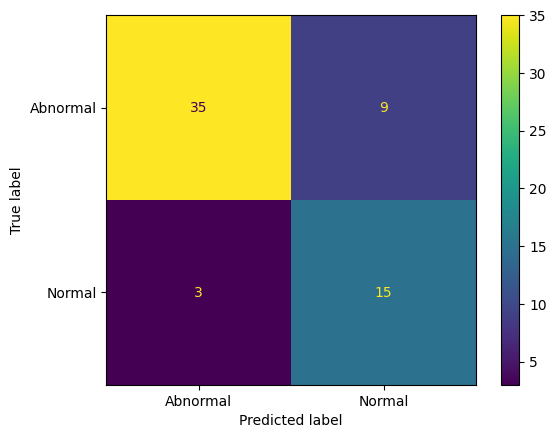

In [488]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

In [489]:
y_train.value_counts()

Class_att
Abnormal    166
Normal       82
Name: count, dtype: int64

Como é possível perceber pelo <i>classification report</i>, temos uma facilidade maior do modelo em classificar corretamente a classe de <i>'abnormal'</i> (sobretudo olhando a métrica de precisão). De fato, ao observar o a distribuição dos valores no dataset de treino, é possível reparar que temos mais ocorrências dessa classe, do que da classe 'normal'. É necessário, então, fazer o balanceamento das classes no dataset de treino

# Balanceamento de classes no dataset de treino

In [490]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)  # Pode ajustar a estratégia de amostragem conforme necessário
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

In [491]:
model = MLPClassifier(verbose=True, max_iter=200)
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': True,
 'warm_start': False}

In [492]:
model.fit(X_train_resampled, y_train_resampled)

/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future

Iteration 1, loss = 9.93855237
Iteration 2, loss = 7.35316194
Iteration 3, loss = 5.11438634
Iteration 4, loss = 3.82669556
Iteration 5, loss = 3.60859256
Iteration 6, loss = 3.67616837
Iteration 7, loss = 3.13012975
Iteration 8, loss = 2.18569881
Iteration 9, loss = 1.50063109
Iteration 10, loss = 1.46997717
Iteration 11, loss = 1.48898273
Iteration 12, loss = 1.27989821
Iteration 13, loss = 1.00523513
Iteration 14, loss = 0.88185664
Iteration 15, loss = 0.91437411
Iteration 16, loss = 0.93719907
Iteration 17, loss = 0.88262882
Iteration 18, loss = 0.78683017
Iteration 19, loss = 0.69695937
Iteration 20, loss = 0.68722850
Iteration 21, loss = 0.70703962
Iteration 22, loss = 0.66363501
Iteration 23, loss = 0.61322174
Iteration 24, loss = 0.58077516
Iteration 25, loss = 0.57732166
Iteration 26, loss = 0.55342094
Iteration 27, loss = 0.51614404
Iteration 28, loss = 0.50415473
Iteration 29, loss = 0.50737083
Iteration 30, loss = 0.48868895
Iteration 31, loss = 0.46885883
Iteration 32, los

Iteration 34, loss = 0.44522657
Iteration 35, loss = 0.43431331
Iteration 36, loss = 0.43066535
Iteration 37, loss = 0.42482930
Iteration 38, loss = 0.41397495
Iteration 39, loss = 0.40827762
Iteration 40, loss = 0.40485310
Iteration 41, loss = 0.39729023
Iteration 42, loss = 0.39537542
Iteration 43, loss = 0.38633533
Iteration 44, loss = 0.38158076
Iteration 45, loss = 0.37630058
Iteration 46, loss = 0.37157984
Iteration 47, loss = 0.36633421
Iteration 48, loss = 0.36252283
Iteration 49, loss = 0.35755159
Iteration 50, loss = 0.35024905
Iteration 51, loss = 0.34285453
Iteration 52, loss = 0.33566591
Iteration 53, loss = 0.32905380
Iteration 54, loss = 0.32498109
Iteration 55, loss = 0.32246534
Iteration 56, loss = 0.31763511
Iteration 57, loss = 0.31552025
Iteration 58, loss = 0.31330803
Iteration 59, loss = 0.30957762
Iteration 60, loss = 0.30668045
Iteration 61, loss = 0.30713803
Iteration 62, loss = 0.30208955
Iteration 63, loss = 0.30184150
Iteration 64, loss = 0.30062855
Iteratio

/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(verbose=True)

In [493]:
y_pred = model.predict(X_test)

/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [494]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Abnormal       0.90      0.84      0.87        44
      Normal       0.67      0.78      0.72        18

    accuracy                           0.82        62
   macro avg       0.78      0.81      0.79        62
weighted avg       0.83      0.82      0.83        62



/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future

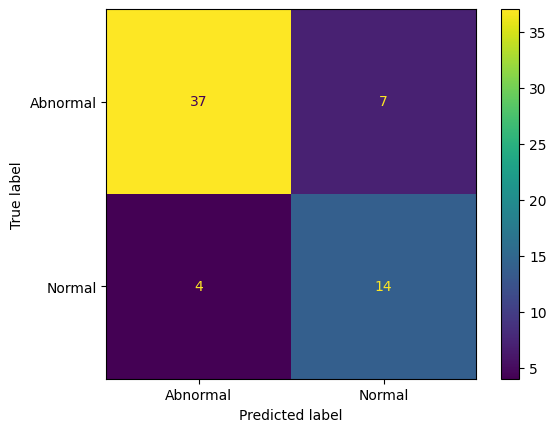

In [495]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

In [496]:
#WIP: removing outliers
from scipy import stats
outliers_removed = df[(np.abs(stats.zscore(X)) < 3).all(axis=1)]
outliers_removed.shape

(298, 13)

In [497]:
y = outliers_removed['Class_att']
X = outliers_removed.drop(['Class_att'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)
model = MLPClassifier(verbose=True, max_iter=200)
# smote = SMOTE(sampling_strategy='auto', random_state=42)  # Pode ajustar a estratégia de amostragem conforme necessário
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future

Iteration 1, loss = 3.55027329
Iteration 2, loss = 1.98071789
Iteration 3, loss = 1.44431179
Iteration 4, loss = 1.83758156
Iteration 5, loss = 1.86478651
Iteration 6, loss = 1.48970640
Iteration 7, loss = 1.23515979
Iteration 8, loss = 1.15266817
Iteration 9, loss = 1.17724677
Iteration 10, loss = 1.14274414
Iteration 11, loss = 1.02530393
Iteration 12, loss = 0.93719520
Iteration 13, loss = 0.87591515
Iteration 14, loss = 0.85996364
Iteration 15, loss = 0.81916138
Iteration 16, loss = 0.76266078
Iteration 17, loss = 0.71470495
Iteration 18, loss = 0.67886196
Iteration 19, loss = 0.65035329
Iteration 20, loss = 0.62565708
Iteration 21, loss = 0.59251184
Iteration 22, loss = 0.55590594
Iteration 23, loss = 0.52422067
Iteration 24, loss = 0.50119702
Iteration 25, loss = 0.47893733
Iteration 26, loss = 0.45487435
Iteration 27, loss = 0.43706426
Iteration 28, loss = 0.42360217
Iteration 29, loss = 0.40556899
Iteration 30, loss = 0.39335258
Iteration 31, loss = 0.38229536
Iteration 32, los

/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future

# using kfold
acho que nao funcionou mto bem

In [498]:
kf = KFold(n_splits=3, shuffle=False)

In [499]:
model = MLPClassifier(verbose=False)
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [500]:
for i, (train_index, test_index) in enumerate(kf.split(X)):
  print(f"iteration {i}:")
  X_train = X.iloc[train_index]
  y_train = y.iloc[train_index]
  X_test = X.iloc[test_index]
  y_test = y.iloc[test_index]

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  print(classification_report(y_test, y_pred))

/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future

iteration 0:


/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spars

              precision    recall  f1-score   support

    Abnormal       1.00      0.40      0.57       100
      Normal       0.00      0.00      0.00         0

    accuracy                           0.40       100
   macro avg       0.50      0.20      0.29       100
weighted avg       1.00      0.40      0.57       100

iteration 1:
              precision    recall  f1-score   support

    Abnormal       0.99      0.94      0.96        98
      Normal       0.00      0.00      0.00         1

    accuracy                           0.93        99
   macro avg       0.49      0.47      0.48        99
weighted avg       0.98      0.93      0.95        99

iteration 2:
              precision    recall  f1-score   support

    Abnormal       0.00      0.00      0.00       0.0
      Normal       0.00      0.00      0.00      99.0

    accuracy                           0.00      99.0
   macro avg       0.00      0.00      0.00      99.0
weighted avg       0.00      0.00      0.00     

/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spars

In [501]:
y_pred = model.predict(X_test)

/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [502]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Abnormal       0.00      0.00      0.00       0.0
      Normal       0.00      0.00      0.00      99.0

    accuracy                           0.00      99.0
   macro avg       0.00      0.00      0.00      99.0
weighted avg       0.00      0.00      0.00      99.0



/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

In [503]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [504]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred, y_test, pos_label=1)

/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/cebms/anaconda3/envs/SI/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


TypeError: unsupported operand type(s) for -: 'str' and 'str'